<a href="https://colab.research.google.com/github/Eezzeldin/POC/blob/stackedReg/Profit_ML_V5_run0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
pip install gplearn

In [185]:
#pip install tqdm

In [186]:
#pip install fitter

In [187]:
'''
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generating some synthetic data for demonstration
# For example, let's try to discover the relationship y = x^2 - x + 1
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the symbolic regressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=3, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0 ,n_jobs=-1)
est_gp.fit(X_train, y_train)

# Making predictions
y_pred = est_gp.predict(X_test)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
'''


'\nfrom gplearn.genetic import SymbolicRegressor, SymbolicTransformer\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Generating some synthetic data for demonstration\n# For example, let\'s try to discover the relationship y = x^2 - x + 1\nX = np.linspace(-1, 1, 100).reshape(-1, 1)\ny = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1\n\n# Splitting data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Creating and training the symbolic regressor\nest_gp = SymbolicRegressor(population_size=5000,\n                           generations=3, stopping_criteria=0.01,\n                           p_crossover=0.7, p_subtree_mutation=0.1,\n                           p_hoist_mutation=0.05, p_point_mutation=0.1,\n                           max_samples=0.9, verbose=1,\n                           parsimony_coefficient=0.01, random_state=0 ,n_job

In [188]:
import pandas as pd
import numpy as np

import random

from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [189]:
'''
+The reason an MMC  has the Profit it does is :
- price, TIV decay
- R2 TIV , R2 Price

- Confidence measure : number of points.

- Year of Release (candidate for removal)

+missing from analysis :
TIV Launch price

+grouping variable    : Launch Price Bins.
+granularity variable : MMC
'''

'\n+The reason an MMC  has the Profit it does is :\n- price, TIV decay\n- R2 TIV , R2 Price\n\n- Confidence measure : number of points.\n\n- Year of Release (candidate for removal)\n\n+missing from analysis :\nTIV Launch price\n\n+grouping variable    : Launch Price Bins.\n+granularity variable : MMC\n'

In [190]:
input_file_path    = "/content/profit_pred_3.csv"

col_rename_dict = {
    "Launch Price (bin)"   : "LPB" ,
    'Avg. Launch Price'    : "LP"  ,
    "Avg. Launch TIV"      : "LTIV",
    "Model Memory Carrier" : "MMC" ,
    "Year of Release Date" : "Year",
    "Avg. Point Count 1000": "PC"  ,
    "Avg. Price decay"     : "Price_Decay",
    "Avg. Price rsquared"  : "Price_R2"  ,
    "Avg. TIV decay"       : "TIV_Decay" ,
    "Avg. TIV rsquared"    : "TIV_R2",
}

not_Features           = ["Profit" , "MMC" ,"PC"]
Target                 = "Profit"
pred_col_name          = "Profit_Pred"

scaler_dict            = {}
interaction_1_name     = "Price_Decay_R2"
interaction_1_terms    = ["Price_R2" , "Price_Decay"]

grouping_col           = "LPB" # .astype("category")

number_of_test_per_fold = 1
fold_y_pred             = "fold_y_pred"
fold_test_index         = "fold_test_index"
fold_num                = 'fold_num'
fold_y_g_pred           = "fold_y_g_pred"

interaction       = True
one_hot           = True
scale_features    = True
drop_grouping_var = True
Kfold_symbolic    = True

cuttof_col_name       = "PC"
PC_cut_off            = True
cuttoff_threshold     = 20


#winner
generations=100
population_size=4000
hall_of_fame=200
n_components=10

#winner
generations=200 # * 2
population_size=8000 # * 2
hall_of_fame=100
n_components = 30
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005

#winner
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005


#competitor
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005



In [191]:
data_input  = pd.read_csv (input_file_path)
data_input.head ()

Launch Price (bin)          Model Memory Carrier  Year of Release Date  \
0                1000   iPhone XS Max_512GB_Verizon                  2018   
1                1000  iPhone XS Max_512GB_Unlocked                  2018   
2                1000  iPhone XS Max_256GB_Unlocked                  2018   
3                1000        iPhone X_256GB_Verizon                  2017   
4                 900   iPhone XS Max_256GB_Verizon                  2018   

   Avg. Launch Price  Avg. Launch TIV  Avg. Point Count 1000  \
0            1029.35          656.816                     19   
1            1014.39          634.388                     20   
2            1008.15          602.997                     20   
3            1011.38          602.270                     19   
4             982.38          562.836                     20   

   Avg. Price decay  Avg. Price rsquared  Avg. TIV decay  Avg. TIV rsquared  \
0         -0.001192             0.894662       -0.001335           0.879887   
1         -0.001009             0.911918       -0.001326           0.918513   
2         -0.001031             0.915380       -0.001333           0.932912   
3         -0.001220             0.958448       -0.001388           0.895701   
4         -0.001070             0.891031       -0.001114           0.860168   

    Profit  
0    41381  
1   227473  
2  1514777  
3   126462  
4   199737

In [192]:
data_input.shape

(114, 11)

In [193]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Launch Price (bin)     114 non-null    int64  
 1   Model Memory Carrier   114 non-null    object 
 2   Year of Release Date   114 non-null    int64  
 3   Avg. Launch Price      114 non-null    float64
 4   Avg. Launch TIV        114 non-null    float64
 5   Avg. Point Count 1000  114 non-null    int64  
 6   Avg. Price decay       114 non-null    float64
 7   Avg. Price rsquared    114 non-null    float64
 8   Avg. TIV decay         114 non-null    float64
 9   Avg. TIV rsquared      114 non-null    float64
 10  Profit                 114 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 9.9+ KB


In [194]:
data_input.columns

Index(['Launch Price (bin)', 'Model Memory Carrier', 'Year of Release Date',
       'Avg. Launch Price', 'Avg. Launch TIV', 'Avg. Point Count 1000',
       'Avg. Price decay', 'Avg. Price rsquared', 'Avg. TIV decay',
       'Avg. TIV rsquared', 'Profit'],
      dtype='object')

In [195]:
data_input.rename (col_rename_dict,axis =1 ,inplace=True)
data_input.head()

LPB                           MMC  Year       LP     LTIV  PC  \
0  1000   iPhone XS Max_512GB_Verizon  2018  1029.35  656.816  19   
1  1000  iPhone XS Max_512GB_Unlocked  2018  1014.39  634.388  20   
2  1000  iPhone XS Max_256GB_Unlocked  2018  1008.15  602.997  20   
3  1000        iPhone X_256GB_Verizon  2017  1011.38  602.270  19   
4   900   iPhone XS Max_256GB_Verizon  2018   982.38  562.836  20   

   Price_Decay  Price_R2  TIV_Decay    TIV_R2   Profit  
0    -0.001192  0.894662  -0.001335  0.879887    41381  
1    -0.001009  0.911918  -0.001326  0.918513   227473  
2    -0.001031  0.915380  -0.001333  0.932912  1514777  
3    -0.001220  0.958448  -0.001388  0.895701   126462  
4    -0.001070  0.891031  -0.001114  0.860168   199737

In [196]:
if PC_cut_off :
   c = data_input [cuttof_col_name] >= cuttoff_threshold
   data_input = data_input [c]

In [197]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

<ipython-input-197-25cde5170375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input [grouping_col] = data_input [grouping_col].astype("category")


In [198]:
#data_input [interaction_1_name] = data_input [interaction_1_terms [0]]  * data_input [interaction_1_terms [1]]

In [199]:
X = data_input.drop (not_Features , axis=1)
y =  data_input [Target]

In [200]:
X.head ( )

LPB  Year       LP     LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2
1  1000  2018  1014.39  634.388    -0.001009  0.911918  -0.001326  0.918513
2  1000  2018  1008.15  602.997    -0.001031  0.915380  -0.001333  0.932912
4   900  2018   982.38  562.836    -0.001070  0.891031  -0.001114  0.860168
5   900  2017   973.07  508.062    -0.001065  0.963357  -0.001140  0.923691
6   800  2018   890.93  525.731    -0.001198  0.925255  -0.001412  0.943464

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 111
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          70 non-null     category
 1   Year         70 non-null     int64   
 2   LP           70 non-null     float64 
 3   LTIV         70 non-null     float64 
 4   Price_Decay  70 non-null     float64 
 5   Price_R2     70 non-null     float64 
 6   TIV_Decay    70 non-null     float64 
 7   TIV_R2       70 non-null     float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 4.8 KB


In [202]:
test_size      = int  (X.shape [0] * 0.3)

test_indicies  = X.sample (test_size).index.values
train_indicies = [i for i in X.index if i not in test_indicies]

X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [203]:
y_train

1       227473
4       199737
5      1523024
8       351604
9       122394
14     3220899
18     2857260
20      131109
21      179596
23     1229447
24       11238
26      222485
27       99099
29      502454
30     1644980
31     2174113
34     1579163
39      279454
41      894328
46      567515
47      148986
51       92765
52      330826
55     1472298
57     1509835
62      409495
63     3822921
70       51717
73      562045
74      465285
78       88093
82     1019192
85      188370
86     1587526
87       86849
88     1258660
89     4392323
90     2373526
98     2375994
99     2548821
101     678468
102    5747639
103     693369
104    3065411
105     105084
106     620795
107    1317866
108     890989
111     397857
Name: Profit, dtype: int64

2024-03-24 22:55:00.069 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-24 22:55:00.083 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-24 22:55:00.097 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-24 22:55:00.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-24 22:55:00.297 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm     5.042514e-12  3312.392807  3318.068268     inf      0.105341   
gamma       5.777782e-12  3275.147580  3280.823041     inf      0.072851   
beta        5.869666e-12  3299.038427  3306.605708     inf      0.084476   
expon       6.085828e-12  3296.991932  3300.775573     inf      0.133092   
norm        1.011568e-11  3357.724193  3361.507834     inf      0.192155   

         ks_pvalue  
lognorm   0.610746  
gamma     0.940309  
beta      0.846471  
expon     0.321539  
norm      0.046505

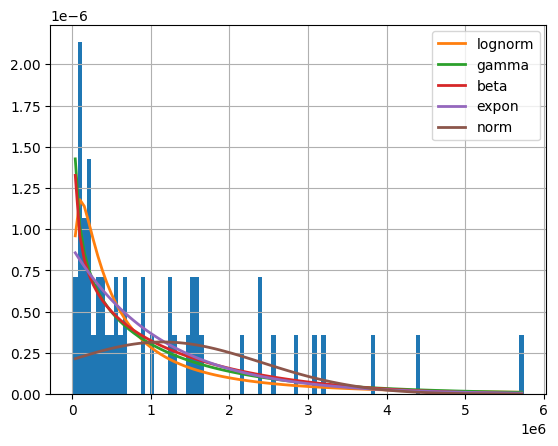

In [204]:
from fitter import Fitter
import numpy as np

# Assuming 'y' is your target variable, which is a NumPy array or a list of your data points
#y = np.random.normal(loc=0, scale=1, size=1000)  # Example data

# Create a Fitter instance with your data
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'] )  # Specify distributions you want to test

# Fit the distributions to your data and find the best fit
f.fit()
# This will fit all the distributions you've listed (or all available distributions if you don't specify) to your data

# Display the summary of the best fitting distributions
f.summary()


In [205]:
import scipy
from scipy.stats import *  # Import all distributions

# Fit the distributions and find the best
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'])
f.fit()
best_fit_name, best_fit_params = list(f.get_best(method='sumsquare_error').items())[0]
print (best_fit_name)
print (best_fit_params )
# Use the best fitting distribution's parameters to calculate the PDF values for y
# Check the name of the best fitting distribution and dynamically call the scipy.stats function
dist = getattr(scipy.stats, best_fit_name)  # Dynamically get the distribution class
pdf_values_y = dist.pdf(y_train, **best_fit_params)  # Calculate PDF values using the best fit parameters


2024-03-24 22:55:01.264 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-24 22:55:01.278 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-24 22:55:01.312 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-24 22:55:01.580 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)
2024-03-24 22:55:01.593 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


lognorm
{'s': 1.2735175004046686, 'loc': -11866.380641542319, 'scale': 596321.1269642866}


In [206]:
pdf_values_y.shape

(49,)

In [207]:
pd.DataFrame (pdf_values_y).describe()

0
count  4.900000e+01
mean   5.487180e-07
std    4.332569e-07
min    1.114099e-08
25%    1.463133e-07
50%    4.946127e-07
75%    1.021526e-06
max    1.181946e-06

array([[<Axes: title={'center': '0'}>]], dtype=object)

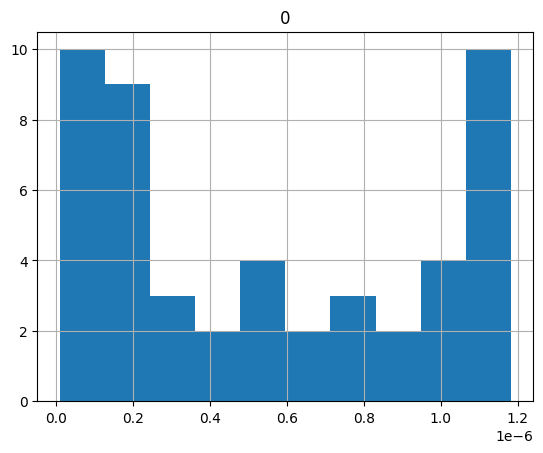

In [208]:
pd.DataFrame (pdf_values_y).hist()

In [209]:
scaler_dict  [Target] = MinMaxScaler().fit (y_train.values.reshape (-1,1))
y_train_scaled        = scaler_dict  [Target].transform (y_train.values.reshape (-1,1))
y_train_scaled        = y_train_scaled + 0.000000001

In [210]:
scaler_dict  [Target].inverse_transform (y_train_scaled )

array([[ 227473.0057364],
       [ 199737.0057364],
       [1523024.0057364],
       [ 351604.0057364],
       [ 122394.0057364],
       [3220899.0057364],
       [2857260.0057364],
       [ 131109.0057364],
       [ 179596.0057364],
       [1229447.0057364],
       [  11238.0057364],
       [ 222485.0057364],
       [  99099.0057364],
       [ 502454.0057364],
       [1644980.0057364],
       [2174113.0057364],
       [1579163.0057364],
       [ 279454.0057364],
       [ 894328.0057364],
       [ 567515.0057364],
       [ 148986.0057364],
       [  92765.0057364],
       [ 330826.0057364],
       [1472298.0057364],
       [1509835.0057364],
       [ 409495.0057364],
       [3822921.0057364],
       [  51717.0057364],
       [ 562045.0057364],
       [ 465285.0057364],
       [  88093.0057364],
       [1019192.0057364],
       [ 188370.0057364],
       [1587526.0057364],
       [  86849.0057364],
       [1258660.0057364],
       [4392323.0057364],
       [2373526.0057364],
       [2375

In [211]:
pd.DataFrame (y_train_scaled).describe()

0
count  4.900000e+01
mean   1.984097e-01
std    2.221913e-01
min    1.000000e-09
25%    3.286015e-02
50%    1.062612e-01
75%    2.733290e-01
max    1.000000e+00

array([[<Axes: title={'center': '0'}>]], dtype=object)

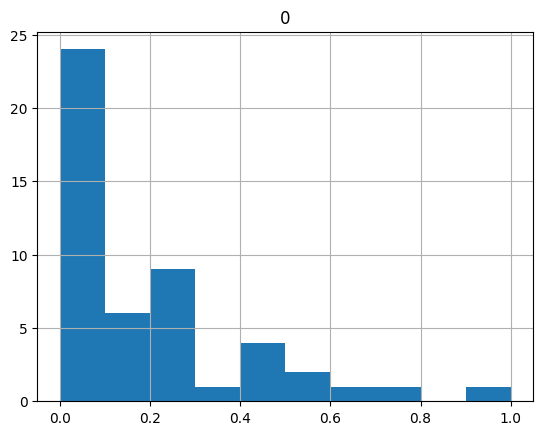

In [212]:
pd.DataFrame (y_train_scaled).hist()

In [213]:
y_train_scaled.shape

(49, 1)

In [214]:
X_train.shape

(49, 8)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV , KFold, cross_val_predict , LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error


# Define the polynomial features followed by MinMax scaling part of the pipeline
poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# FeatureUnion to combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform", SymbolicTransformer(generations=20, population_size=2000,
                                                 hall_of_fame=50, n_components=10,
                                                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                                 parsimony_coefficient=0.0005, max_samples=0.9, verbose=0,n_jobs=-1)),
])

#Layer 1 Stacking
model = MLPRegressor(
    hidden_layer_sizes=(250, 200, 100, 100,100),  # More layers and different numbers of neurons
    activation='tanh',  # Different activation function
    solver='sgd',  # Different optimizer
    learning_rate_init=0.01,  # Initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch size
    alpha=0.0001,  # L2 regularization
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=20,  # Patience for early stopping
    random_state=0
)
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('mlp', model
    )
]
# Define the meta regressor
meta_regressor = Ridge(alpha=1.0)
# Create the stacking regressor
cv_stacked = LeaveOneOut ()
cv_stacked = 3
stacked_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_regressor,
    cv=cv_stacked   # This cv is for the base models
)
#Layer 2 Stacking
base_models = [
    ('stacked1', stacked_regressor),
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('mlp', model
    )
]
meta_regressor = Ridge(alpha=1.0)
cv_stacked = LeaveOneOut ()
cv_stacked = 3
stacked_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_regressor,
    cv=cv_stacked , passthrough=True   # This cv is for the base models
)



# Define a placeholder pipeline with a generic 'regressor' step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('regressor', stacked_regressor)  # Placeholder, will be replaced by RandomizedSearchCV
])



# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'features__poly_minmax__poly__degree': [randint (1,3).rvs() for _ in range (100)],
    'features__poly_minmax__poly__interaction_only' : [True,False],
    'features__symbolic_transform__population_size': [randint (50,100).rvs () for _ in range (100)],
    'features__symbolic_transform__generations': [randint (5,30).rvs() for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [randint (5,30).rvs () for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [i // 2 for i in param_distributions ['features__symbolic_transform__population_size']],
    'features__symbolic_transform__n_components': [randint (1,100).rvs () for _ in range (100)],
    #'regressor': np.random.choice ([LinearRegression()]),
    #'regressor__max_iter': [randint (100,10000).rvs () for _ in range (100)],
    'regressor__rf__n_estimators': [randint (3000,5000).rvs () for _ in range (100)] ,
    'regressor__rf__max_depth': randint(3, 10).rvs (size = 100),
    'regressor__rf__max_features': loguniform(1e-2, 0.5).rvs (size = 100),
    'regressor__final_estimator__alpha': loguniform(1e-2, 10).rvs (size = 100) ,
    'regressor__mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],

}

cv     = 10
cv     = LeaveOneOut ()
n_iter = 25
#neg_root_mean_squared_error
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions,
                                   n_iter=n_iter, verbose=50,cv = cv , scoring = 'max_error' )

random_search.fit (X_train,y_train_scaled.ravel())
print (random_search.best_score_)
print (random_search.best_params_)

import pickle

# Save the pipeline
with open('/content/drive/MyDrive/Colab Notebooks/saved_pipeline.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)


Fitting 49 folds for each of 25 candidates, totalling 1225 fits
[CV 1/49; 1/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=25, features__symbolic_transform__n_components=63, features__symbolic_transform__population_size=86, regressor__final_estimator__alpha=0.027589827818209355, regressor__mlp__activation=logistic, regressor__rf__max_depth=3, regressor__rf__max_features=0.019413569776514, regressor__rf__n_estimators=3504
[CV 1/49; 1/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=25, features__symbolic_transform__n_components=63, features__symbolic_transform__population_size=86, regressor__final_estimator__alpha=0.027589827818209355, regressor__mlp__activation=logistic, regressor__rf__max_depth=3, regressor__rf__max_features=0.019413569776514, regressor__rf__n_estimators=3504;, score=nan total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.393 total time=  54.3s
[CV 2/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.303 total time=  56.2s
[CV 3/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.026 total time=  49.4s
[CV 4/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.013 total time=  54.4s
[CV 5/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.062 total time=  55.3s
[CV 6/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.285 total time=  48.1s
[CV 7/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.332 total time=  52.4s
[CV 8/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.064 total time=  58.3s
[CV 9/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.112 total time=  55.1s
[CV 10/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.078 total time=  59.1s
[CV 11/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.105 total time=  54.2s
[CV 12/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.019 total time= 1.3min
[CV 13/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.076 total time=  55.1s
[CV 14/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 14/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.025 total time= 1.2min
[CV 15/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 15/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.223 total time= 1.1min
[CV 16/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.017 total time=  51.9s
[CV 17/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.041 total time=  53.9s
[CV 18/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.331 total time=  51.6s
[CV 19/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.423 total time=  51.4s
[CV 20/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 20/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.043 total time=  59.1s
[CV 21/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.173 total time=  54.6s
[CV 22/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.126 total time=  49.5s
[CV 23/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.227 total time=  54.7s
[CV 24/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.031 total time=  55.8s
[CV 25/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.004 total time=  57.8s
[CV 26/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.093 total time=  56.0s
[CV 27/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 27/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.229 total time= 1.2min
[CV 28/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.018 total time=  59.6s
[CV 29/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.166 total time=  56.0s
[CV 30/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.185 total time=  49.2s
[CV 31/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.230 total time=  59.4s
[CV 32/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.263 total time= 1.0min
[CV 33/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.113 total time=  51.0s
[CV 34/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.098 total time=  53.8s
[CV 35/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.156 total time=  53.9s
[CV 36/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.070 total time= 1.0min
[CV 37/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.625 total time=  54.2s
[CV 38/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.324 total time=  50.7s
[CV 39/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.102 total time=  53.2s
[CV 40/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-1.504 total time=  53.3s
[CV 41/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.156 total time=  57.8s
[CV 42/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.720 total time=  53.5s
[CV 43/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.419 total time= 1.1min
[CV 44/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.317 total time=  52.1s
[CV 45/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.013 total time=  59.4s
[CV 46/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.043 total time=  52.1s
[CV 47/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.011 total time=  52.5s
[CV 48/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.038 total time=  52.8s
[CV 49/49; 4/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 4/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=20, features__symbolic_transform__n_components=20, features__symbolic_transform__population_size=90, regressor__final_estimator__alpha=0.14973844635271202, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=3322;, score=-0.217 total time=  57.4s
[CV 1/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.045 total time=  47.7s
[CV 2/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.089 total time=  52.3s
[CV 3/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.100 total time=  48.0s
[CV 4/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.9s
[CV 5/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.074 total time=  52.9s
[CV 6/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  12.3s
[CV 7/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  12.6s
[CV 8/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.018 total time=  58.2s
[CV 9/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.051 total time=  54.2s
[CV 10/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.149 total time=  51.5s
[CV 11/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  14.0s
[CV 12/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.048 total time=  50.0s
[CV 13/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.148 total time=  49.7s
[CV 14/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.010 total time=  46.9s
[CV 15/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  14.0s
[CV 16/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.054 total time=  54.5s
[CV 17/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  14.6s
[CV 18/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 18/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.302 total time= 1.2min
[CV 19/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.469 total time=  47.7s
[CV 20/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 20/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.093 total time=  57.3s
[CV 21/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.477 total time=  58.9s
[CV 22/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.184 total time=  50.0s
[CV 23/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  11.8s
[CV 24/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  12.6s
[CV 25/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  12.1s
[CV 26/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.174 total time=  50.2s
[CV 27/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 27/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.0s
[CV 28/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.128 total time=  47.1s
[CV 29/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.139 total time=  48.3s
[CV 30/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.345 total time=  49.5s
[CV 31/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.147 total time=  46.6s
[CV 32/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.8s
[CV 33/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.049 total time= 1.1min
[CV 34/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.6s
[CV 35/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.1s
[CV 36/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 36/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.015 total time= 1.1min
[CV 37/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  13.8s
[CV 38/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.120 total time=  51.9s
[CV 39/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.022 total time=  54.7s
[CV 40/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.279 total time=  49.6s
[CV 41/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.399 total time=  50.3s
[CV 42/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.853 total time=  49.5s
[CV 43/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.100 total time=  56.1s
[CV 44/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=nan total time=  15.7s
[CV 45/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.176 total time=  47.7s
[CV 46/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.211 total time=  52.4s
[CV 47/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.090 total time= 1.0min
[CV 48/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.008 total time=  52.0s
[CV 49/49; 5/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 5/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=19, features__symbolic_transform__n_components=11, features__symbolic_transform__population_size=65, regressor__final_estimator__alpha=1.7754282800393022, regressor__mlp__activation=relu, regressor__rf__max_depth=7, regressor__rf__max_features=0.0993399307451261, regressor__rf__n_estimators=3315;, score=-0.006 total time=  47.7s
[CV 1/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.904 total time= 1.1min
[CV 2/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.168 total time= 1.1min
[CV 3/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.691 total time=  57.0s
[CV 4/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 4/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  25.0s
[CV 5/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.288 total time=  55.8s
[CV 6/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  17.4s
[CV 7/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.156 total time= 1.1min
[CV 8/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.044 total time= 1.1min
[CV 9/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.135 total time=  58.3s
[CV 10/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.076 total time=  57.1s
[CV 11/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.346 total time=  56.2s
[CV 12/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.423 total time=  57.4s
[CV 13/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.177 total time=  55.7s
[CV 14/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.174 total time=  57.6s
[CV 15/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  16.5s
[CV 16/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.003 total time=  58.7s
[CV 17/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.026 total time= 1.0min
[CV 18/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.770 total time=  57.3s
[CV 19/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.312 total time=  59.7s
[CV 20/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 20/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.028 total time= 1.1min
[CV 21/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.191 total time= 1.1min
[CV 22/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.032 total time=  58.4s
[CV 23/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  15.2s
[CV 24/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  15.9s
[CV 25/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.090 total time= 1.0min
[CV 26/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.679 total time=  57.3s
[CV 27/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 27/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.839 total time= 1.1min
[CV 28/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.022 total time= 1.2min
[CV 29/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  16.9s
[CV 30/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 30/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.494 total time= 1.2min
[CV 31/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 31/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  27.2s
[CV 32/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.354 total time=  56.8s
[CV 33/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.067 total time=  56.5s
[CV 34/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.127 total time=  57.3s
[CV 35/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.072 total time=  56.1s
[CV 36/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.279 total time=  56.8s
[CV 37/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.451 total time=  57.3s
[CV 38/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  16.5s
[CV 39/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.245 total time= 1.1min
[CV 40/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  15.9s
[CV 41/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-1.488 total time=  56.9s
[CV 42/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.538 total time=  58.2s
[CV 43/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  54.2s
[CV 44/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  14.8s
[CV 45/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.191 total time= 1.1min
[CV 46/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.179 total time=  56.7s
[CV 47/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  17.9s
[CV 48/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=-0.042 total time= 1.1min
[CV 49/49; 6/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 6/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=25, features__symbolic_transform__population_size=59, regressor__final_estimator__alpha=0.013586476421430837, regressor__mlp__activation=relu, regressor__rf__max_depth=4, regressor__rf__max_features=0.0381054412611574, regressor__rf__n_estimators=4270;, score=nan total time=  15.8s
[CV 1/49; 7/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=28, features__symbolic_transform__n_components=58, features__symbolic_transform__population_size=87, regressor__final_estimator__alpha=0.054044505488981216, regressor__mlp__activation=tanh, regressor__rf__max_depth=6, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3668
[CV 1/49; 7/25] END features__poly_minmax__poly__degree=1,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.289 total time= 1.1min
[CV 2/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.078 total time= 1.0min
[CV 3/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.011 total time=  57.6s
[CV 4/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.106 total time= 1.0min
[CV 5/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.243 total time=  57.5s
[CV 6/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.420 total time= 1.2min
[CV 7/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.262 total time= 1.0min
[CV 8/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.033 total time=  58.6s
[CV 9/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.034 total time=  58.4s
[CV 10/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.064 total time= 1.0min
[CV 11/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.092 total time= 1.1min
[CV 12/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 12/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.001 total time= 1.2min
[CV 13/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.165 total time= 1.3min
[CV 14/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.313 total time=  57.7s
[CV 15/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.030 total time= 1.1min
[CV 16/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.186 total time= 1.2min
[CV 17/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-33.238 total time= 1.1min
[CV 18/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.156 total time= 1.2min
[CV 19/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 19/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.413 total time= 1.4min
[CV 20/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 20/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.111 total time= 1.0min
[CV 21/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.025 total time= 1.1min
[CV 22/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.219 total time= 1.1min
[CV 23/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.144 total time=  58.3s
[CV 24/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.037 total time=  57.2s
[CV 25/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.124 total time=  57.7s
[CV 26/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 26/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.586 total time= 1.2min
[CV 27/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 27/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-11.731 total time= 1.0min
[CV 28/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.190 total time=  58.5s
[CV 29/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.055 total time= 1.0min
[CV 30/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.372 total time= 1.1min
[CV 31/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.231 total time=  59.1s
[CV 32/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.198 total time=  59.2s
[CV 33/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.113 total time= 1.0min
[CV 34/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.011 total time= 1.1min
[CV 35/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.023 total time=  58.2s
[CV 36/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.002 total time= 1.0min
[CV 37/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.604 total time=  56.2s
[CV 38/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 38/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.252 total time= 1.4min
[CV 39/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.266 total time= 1.1min
[CV 40/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.348 total time= 1.1min
[CV 41/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.210 total time=  58.0s
[CV 42/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.638 total time= 1.0min
[CV 43/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.056 total time=  58.8s
[CV 44/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.127 total time= 1.1min
[CV 45/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.115 total time= 1.0min
[CV 46/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.001 total time= 1.2min
[CV 47/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.257 total time= 1.0min
[CV 48/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.016 total time= 1.2min
[CV 49/49; 10/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 10/25] END features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=11, features__symbolic_transform__n_components=38, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=1.4770279633695576, regressor__mlp__activation=logistic, regressor__rf__max_depth=6, regressor__rf__max_features=0.3399680436678561, regressor__rf__n_estimators=4004;, score=-0.278 total time=  59.6s
[CV 1/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.021 total time=  59.9s
[CV 2/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 2/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.169 total time= 1.4min
[CV 3/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.161 total time=  58.2s
[CV 4/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 4/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.038 total time= 1.3min
[CV 5/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.055 total time=  56.9s
[CV 6/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.369 total time=  57.2s
[CV 7/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.412 total time=  56.8s
[CV 8/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.134 total time=  59.1s
[CV 9/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 9/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.044 total time= 1.4min
[CV 10/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.041 total time= 1.2min
[CV 11/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.135 total time=  57.3s
[CV 12/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.126 total time= 1.1min
[CV 13/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 13/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.008 total time= 1.3min
[CV 14/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.026 total time=  57.0s
[CV 15/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.189 total time=  58.6s
[CV 16/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.066 total time= 1.3min
[CV 17/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.139 total time= 1.0min
[CV 18/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.194 total time= 1.0min
[CV 19/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.135 total time= 1.2min
[CV 20/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 20/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.117 total time= 1.1min
[CV 21/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 21/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.168 total time= 1.3min
[CV 22/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.303 total time= 1.1min
[CV 23/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.243 total time= 1.5min
[CV 24/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.121 total time= 1.1min
[CV 25/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.066 total time= 1.2min
[CV 26/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.145 total time= 1.1min
[CV 27/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 27/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.542 total time= 1.4min
[CV 28/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.112 total time= 1.2min
[CV 29/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.152 total time= 1.1min
[CV 30/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.196 total time= 1.0min
[CV 31/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.179 total time= 1.0min
[CV 32/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.135 total time=  58.5s
[CV 33/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 33/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.121 total time= 1.3min
[CV 34/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.063 total time= 1.1min
[CV 35/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.100 total time= 1.1min
[CV 36/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.056 total time=  55.6s
[CV 37/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.450 total time=  53.5s
[CV 38/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.237 total time=  59.1s
[CV 39/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.304 total time=  58.9s
[CV 40/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.797 total time=  58.9s
[CV 41/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.373 total time= 1.1min
[CV 42/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 42/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.769 total time= 1.6min
[CV 43/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.049 total time=  56.9s
[CV 44/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.179 total time=  56.1s
[CV 45/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.161 total time= 1.1min
[CV 46/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.106 total time=  58.6s
[CV 47/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.126 total time=  59.5s
[CV 48/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.003 total time=  56.7s
[CV 49/49; 11/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 11/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=14, features__symbolic_transform__n_components=8, features__symbolic_transform__population_size=63, regressor__final_estimator__alpha=0.22798064088625666, regressor__mlp__activation=tanh, regressor__rf__max_depth=9, regressor__rf__max_features=0.30533223402337517, regressor__rf__n_estimators=4435;, score=-0.081 total time=  59.1s
[CV 1/49; 12/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=16, features__symbolic_transform__n_components=58, features__symbolic_transform__population_size=62, regressor__final_estimator__alpha=0.0878191351067395, regressor__mlp__activation=relu, regressor__rf__max_depth=6, regressor__rf__max_features=0.13071554619643083, regressor__rf__n_estimators=3427
[CV 1/49; 12/25] END features__poly_minmax__poly__degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.205 total time=  56.9s
[CV 2/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.044 total time=  57.8s
[CV 3/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.292 total time=  55.2s
[CV 4/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.157 total time=  56.4s
[CV 5/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.112 total time=  57.9s
[CV 6/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.371 total time=  58.0s
[CV 7/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.230 total time= 1.1min
[CV 8/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.070 total time=  54.0s
[CV 9/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.050 total time=  56.1s
[CV 10/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.166 total time=  57.3s
[CV 11/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 11/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.065 total time= 1.2min
[CV 12/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.107 total time= 1.0min
[CV 13/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.076 total time=  56.8s
[CV 14/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.051 total time= 1.1min
[CV 15/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.011 total time= 1.0min
[CV 16/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.169 total time=  54.5s
[CV 17/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.103 total time=  55.1s
[CV 18/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.132 total time=  55.4s
[CV 19/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.572 total time=  55.4s
[CV 20/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 20/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.102 total time= 1.2min
[CV 21/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.283 total time=  55.1s
[CV 22/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.151 total time=  58.0s
[CV 23/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.125 total time=  54.9s
[CV 24/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.062 total time=  56.4s
[CV 25/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.087 total time=  55.8s
[CV 26/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.078 total time= 1.1min
[CV 27/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 27/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.361 total time=  58.5s
[CV 28/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.127 total time= 1.0min
[CV 29/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.111 total time=  55.1s
[CV 30/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.226 total time=  55.6s
[CV 31/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.216 total time=  55.8s
[CV 32/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.035 total time=  58.1s
[CV 33/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.129 total time=  57.3s
[CV 34/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.057 total time= 1.0min
[CV 35/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-1.176 total time=  58.0s
[CV 36/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.046 total time=  56.5s
[CV 37/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.533 total time=  56.3s
[CV 38/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.271 total time=  55.0s
[CV 39/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.262 total time=  55.5s
[CV 40/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.274 total time=  55.8s
[CV 41/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.456 total time=  57.1s
[CV 42/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.828 total time=  58.9s
[CV 43/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 43/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.092 total time= 1.1min
[CV 44/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.097 total time=  55.0s
[CV 45/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.134 total time= 1.1min
[CV 46/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.119 total time=  55.9s
[CV 47/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 47/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.040 total time= 1.1min
[CV 48/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 48/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.013 total time= 1.1min
[CV 49/49; 13/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 13/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=15, features__symbolic_transform__population_size=58, regressor__final_estimator__alpha=0.9719690626020536, regressor__mlp__activation=logistic, regressor__rf__max_depth=9, regressor__rf__max_features=0.03321707998566415, regressor__rf__n_estimators=4724;, score=-0.300 total time=  58.7s
[CV 1/49; 14/25] START features__poly_minmax__poly__degree=2, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=8, features__symbolic_transform__n_components=66, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.05629452602158407, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.011054956622039327, regressor__rf__n_estimators=4391
[CV 1/49; 14/25] END features__poly_minmax__poly__degre

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.157 total time= 1.1min
[CV 2/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.254 total time= 1.0min
[CV 3/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.092 total time= 1.1min
[CV 4/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.358 total time=  57.9s
[CV 5/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.088 total time= 1.1min
[CV 6/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.394 total time=  55.9s
[CV 7/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.474 total time= 1.0min
[CV 8/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.492 total time= 1.4min
[CV 9/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.227 total time=  59.1s
[CV 10/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.165 total time=  58.9s
[CV 11/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.385 total time=  59.6s
[CV 12/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.162 total time= 1.0min
[CV 13/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 13/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.107 total time= 1.0min
[CV 14/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 14/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.203 total time= 1.0min
[CV 15/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 15/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.151 total time=  57.7s
[CV 16/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 16/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.021 total time=  56.3s
[CV 17/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 17/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.172 total time=  57.1s
[CV 18/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 18/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.162 total time= 1.1min
[CV 19/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 19/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-27.852 total time=  57.0s
[CV 20/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 20/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.052 total time= 1.3min
[CV 21/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 21/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.272 total time= 1.1min
[CV 22/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 22/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.260 total time=  57.0s
[CV 23/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 23/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.113 total time=  57.5s
[CV 24/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 24/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.352 total time= 1.5min
[CV 25/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 25/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-24775.350 total time=  56.2s
[CV 26/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 26/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.137 total time=  57.3s
[CV 27/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger tha

[CV 27/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.250 total time= 1.8min
[CV 28/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 28/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.121 total time= 1.2min
[CV 29/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 29/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.160 total time=  54.8s
[CV 30/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 30/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.281 total time=  54.4s
[CV 31/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 31/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.232 total time=  57.7s
[CV 32/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 32/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.065 total time= 1.2min
[CV 33/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 33/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.057 total time=  50.3s
[CV 34/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 34/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.150 total time= 1.1min
[CV 35/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 35/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.149 total time= 1.0min
[CV 36/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 36/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.252 total time= 1.0min
[CV 37/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 37/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.543 total time= 1.1min
[CV 38/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 38/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.638 total time=  58.5s
[CV 39/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 39/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.181 total time=  51.6s
[CV 40/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 40/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.377 total time=  59.6s
[CV 41/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 41/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-45.674 total time=  54.2s
[CV 42/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 42/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.770 total time=  58.7s
[CV 43/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

[CV 43/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.497 total time= 1.3min
[CV 44/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 44/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.116 total time=  54.6s
[CV 45/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 45/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.162 total time=  58.2s
[CV 46/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 46/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.014 total time= 1.0min
[CV 47/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 47/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.206 total time=  58.0s
[CV 48/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 48/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.131 total time=  54.9s
[CV 49/49; 21/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 49/49; 21/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=False, features__symbolic_transform__generations=17, features__symbolic_transform__n_components=43, features__symbolic_transform__population_size=67, regressor__final_estimator__alpha=0.024905343609907222, regressor__mlp__activation=tanh, regressor__rf__max_depth=4, regressor__rf__max_features=0.014484915050894435, regressor__rf__n_estimators=3715;, score=-0.654 total time= 1.3min
[CV 1/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 1/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.074 total time= 1.1min
[CV 2/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 2/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.028 total time= 1.0min
[CV 3/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 3/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.108 total time= 1.2min
[CV 4/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 4/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.274 total time= 1.1min
[CV 5/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 5/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.138 total time= 1.1min
[CV 6/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 6/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.287 total time= 1.1min
[CV 7/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 7/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.314 total time= 1.1min
[CV 8/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 8/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.080 total time=  58.8s
[CV 9/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 9/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.071 total time= 1.4min
[CV 10/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 10/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.033 total time= 1.2min
[CV 11/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 11/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.030 total time= 1.3min
[CV 12/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

[CV 12/49; 22/25] END features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843;, score=-0.125 total time= 1.4min
[CV 13/49; 22/25] START features__poly_minmax__poly__degree=1, features__poly_minmax__poly__interaction_only=True, features__symbolic_transform__generations=26, features__symbolic_transform__n_components=27, features__symbolic_transform__population_size=96, regressor__final_estimator__alpha=0.4862745691382367, regressor__mlp__activation=tanh, regressor__rf__max_depth=8, regressor__rf__max_features=0.16715967819715197, regressor__rf__n_estimators=4843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

In [216]:
 pd.DataFrame (random_search.cv_results_).sort_values("rank_test_score").head ()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       8.654411      0.590283         0.162860        0.027728   
3       10.946273      0.853728         0.159681        0.017222   
16       7.983518      0.570330         0.112265        0.025041   
17       6.175022      0.165084         0.136475        0.033530   
14       8.658168      0.435271         0.141105        0.029587   

   param_regressor__n_estimators  \
13                          4772   
3                           4666   
16                          3041   
17                          3151   
14                          3768   

   param_features__symbolic_transform__population_size  \
13                                                 83    
3                                                  72    
16                                                 88    
17                                                 69    
14                                                 68    

   param_features__symbolic_transform__n_components  \
13                                               21   
3                                                28   
16                                               34   
17                                               30   
14                                               40   

   param_features__symbolic_transform__generations  \
13                                               8   
3                                               25   
16                                              12   
17                                               8   
14                                               5   

   param_features__poly_minmax__poly__interaction_only  \
13                                               True    
3                                               False    
16                                               True    
17                                              False    
14                                               True    

   param_features__poly_minmax__poly__degree  ... split3_test_score  \
13                                         1  ...         -0.303694   
3                                          1  ...         -0.426525   
16                                         2  ...         -0.345105   
17                                         1  ...         -0.394741   
14                                         2  ...         -0.344933   

    split4_test_score  split5_test_score  split6_test_score  \
13          -0.117532          -0.369748          -0.230054   
3           -0.050393          -0.338352          -0.193193   
16          -0.160484          -0.385032          -0.313645   
17          -0.146793          -0.398970          -0.153812   
14          -0.147249          -0.320861          -0.162501   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
13          -0.666713          -0.797509          -0.193446        -0.334407   
3           -0.693687          -0.798614          -0.198739        -0.365325   
16          -0.655761          -0.817603          -0.256976        -0.372622   
17          -0.645590          -0.818130          -0.379535        -0.380438   
14          -0.631259          -0.779736          -0.345285        -0.384477   

    std_test_score  rank_test_score  
13        0.211565                1  
3         0.218068                2  
16        0.196489                3  
17        0.202836                4  
14        0.190408                5  

[5 rows x 24 columns]

In [217]:
random_search.predict (X_train)

array([0.13058453, 0.04695004, 0.25493087, 0.05994939, 0.0343683 ,
       0.44292519, 0.3948493 , 0.08407387, 0.04790922, 0.22839315,
       0.02228507, 0.03191744, 0.11088583, 0.0897505 , 0.37660891,
       0.39284035, 0.25278146, 0.16129199, 0.13952463, 0.08556234,
       0.03924372, 0.03494638, 0.06210826, 0.22487396, 0.24289988,
       0.16787716, 0.54378942, 0.0184448 , 0.10244098, 0.1411544 ,
       0.0391979 , 0.15671315, 0.05042375, 0.26596045, 0.01973942,
       0.22698275, 0.62313459, 0.45845208, 0.36081547, 0.38109737,
       0.26235676, 0.76303946, 0.24444408, 0.48704284, 0.07298798,
       0.18857907, 0.17757013, 0.13926233, 0.10125219])

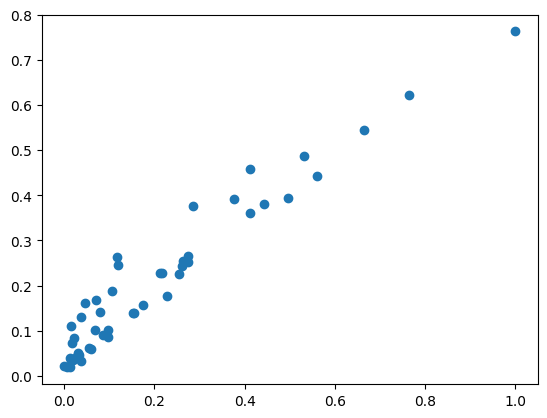

In [218]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
#y_val_pred = cross_val_predict(random_search, X_train,y_train_scaled.ravel(), cv=kf)
fig, ax = plt.subplots()

ax.scatter(y_train_scaled,random_search.predict (X_train))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [219]:
random_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.0min remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


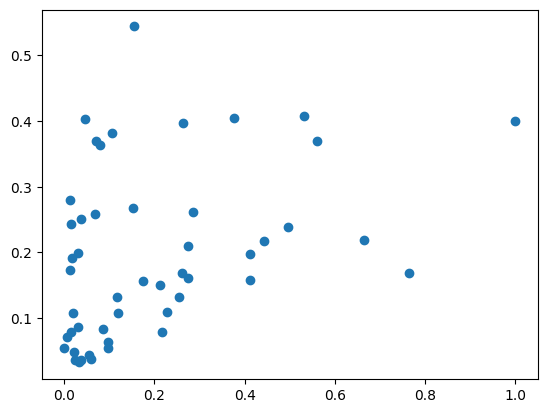

In [220]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
#LOO = LeaveOneOut (verbose = 50)
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(),
                               cv=kf,
                               verbose=50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

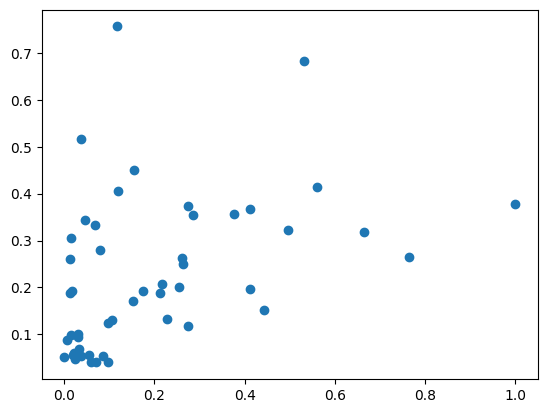

In [221]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [222]:
import pickle

# Save the pipeline
with open('saved_pipeline.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)


In [223]:

# Load the pipeline
with open('saved_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [224]:
loaded_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

In [225]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
clone (loaded_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

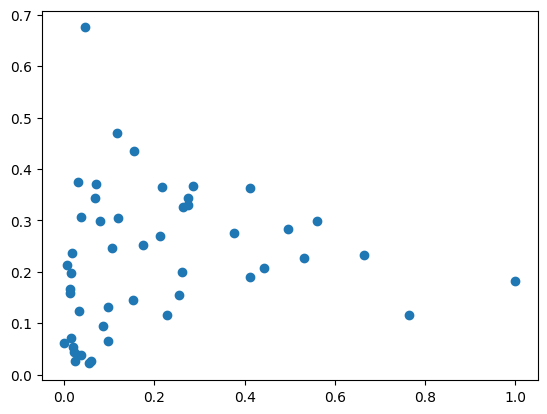

In [226]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin, clone


rs          = clone (random_search.best_estimator_)
regressors  = [rs,rs, rs]
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cv_strategy = LeaveOneOut ()
X_augmented = X_train.copy()
for regressor in regressors[:-1]:  # Exclude the last regressor for now
    # Generate cross-validated predictions
    predictions = cross_val_predict(regressor, X_augmented, y_train_scaled.ravel()
    , cv=cv_strategy , n_jobs = -1 , verbose = 50 )
    # Augment features with predictions
    X_augmented = np.hstack([X_augmented, predictions.reshape(-1, 1)])


final_regressor = regressors[-1].fit(X_augmented,y_train_scaled.ravel())


LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(final_regressor ,
                               X_augmented,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1,
                               )

'''

# Define base regressors
base_regressors = [
    ('lr', random_search.best_estimator_),
    ('dt', random_search.best_estimator_),
    ('svr', random_search.best_estimator_)
]

# Define the stacking ensemble model
stacked_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=random_search.best_estimator_
)

np.column_stack([
    cross_val_predict(regressor, X_train, y_train, cv=kf) for regressor in base_regressors
])

LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(stacked_regressor ,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()
'''

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

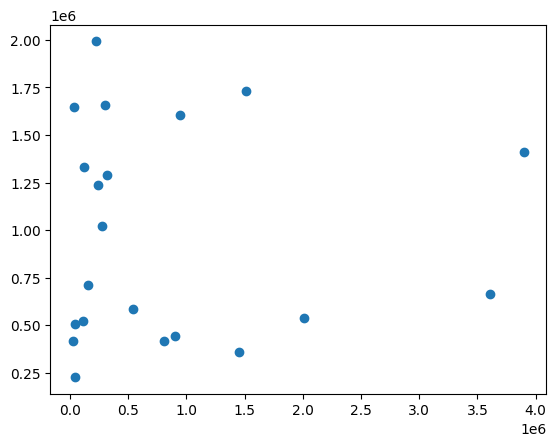

In [227]:
fig, ax = plt.subplots()

ax.scatter(y_test, scaler_dict  [Target].inverse_transform (random_search.predict (X_test).reshape (-1,1) ))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

reg_cv.score (X_cv,y_cv) 0.8468368023705065
reg_cv.intercept [0.76907372]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

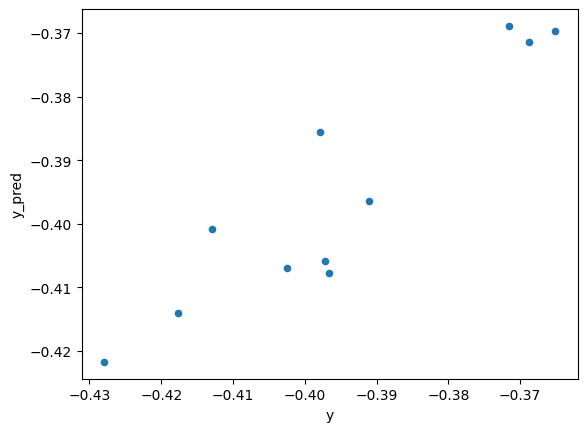

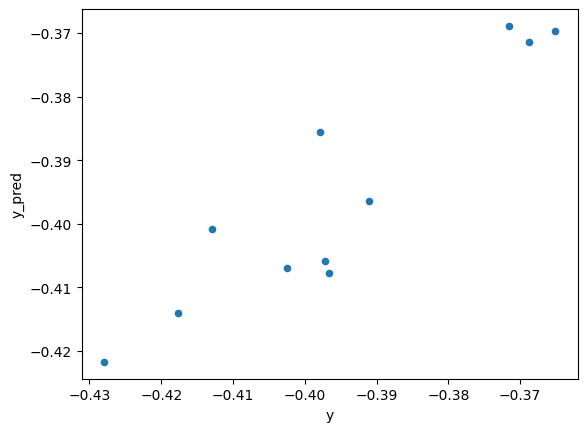

In [102]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_test_score" ] #"mean_fit_time"  , mean_test_score  , "rank_test_score"
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]
cv_df = cv_df.dropna()

X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df ["y"]         = y_cv
cv_df ["y_pred"]    = y_cv_scaler.inverse_transform (y_pred_cv)


cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

cv_df.plot.scatter ("y" , "y_pred" )

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [103]:
for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]):
  print ('param_col_list' , col ,coef)
  print ()
#Rank

param_col_list param_features__poly_minmax__poly__degree 0.45988526648023914

param_col_list param_features__poly_minmax__poly__interaction_only -0.11446452588108774

param_col_list param_features__symbolic_transform__population_size 0.004654110111943182

param_col_list param_features__symbolic_transform__generations 0.14504816929401876

param_col_list param_features__symbolic_transform__n_components -0.29535622876968115

param_col_list param_regressor__n_estimators -0.6400186408599355



<Axes: >

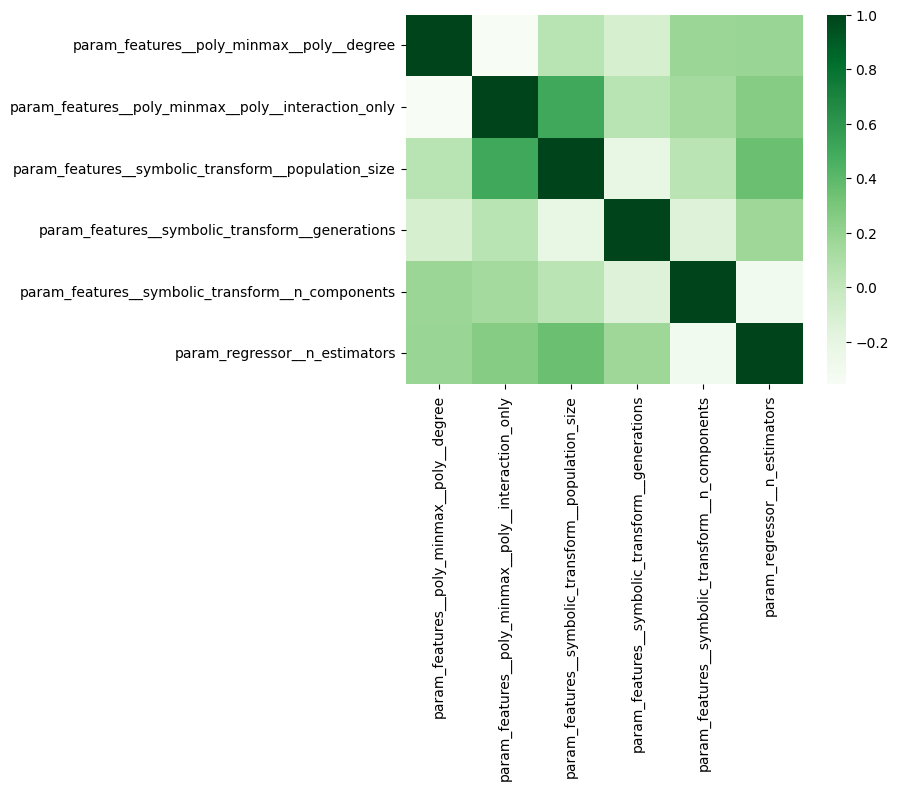

In [104]:
import seaborn as sns

df = pd.DataFrame (X_cv_scaled , columns = X_cv.columns)

sns.heatmap(df.corr(),cmap='Greens',annot=False)


reg_cv.score (X_cv,y_cv) 0.7130101085130478
param_col_list param_features__poly_minmax__poly__degree 0.08767170928499717
param_col_list param_features__poly_minmax__poly__interaction_only 0.08019523176419169
param_col_list param_features__symbolic_transform__population_size -0.036523965362795584
param_col_list param_features__symbolic_transform__generations 0.21589287216216405
param_col_list param_features__symbolic_transform__n_components -0.8105265668895776
param_col_list param_regressor__n_estimators 0.14259691292311408
reg_cv.intercept [0.48412239]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

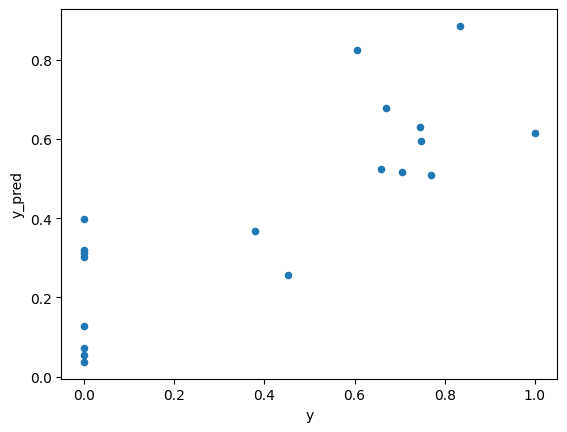

In [105]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_fit_time" ] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]): print ('param_col_list' ,col  ,coef)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

reg_cv.score (X_cv,y_cv) 0.6127938277071288
param_col_list Index(['mean_fit_time'], dtype='object') reg_cv.coef_ [[-0.724044]]
reg_cv.intercept [0.97920518]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

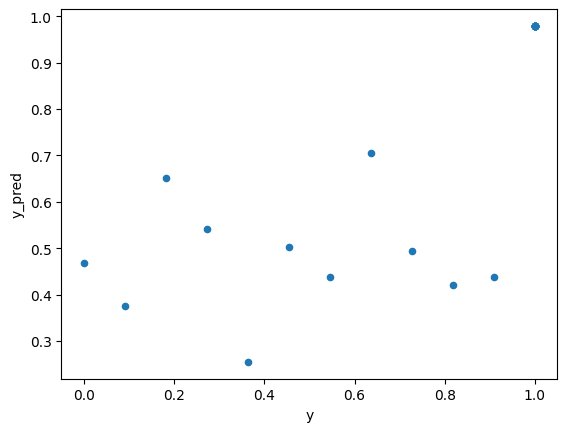

In [106]:
param_col_list  = []
performance_list = ["mean_fit_time" , "rank_test_score"] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_): print ('param_col_list' ,X_cv.columns  , "reg_cv.coef_",reg_cv.coef_)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
from scipy.stats import randint
randint(10, 200).rvs()

59

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from tqdm import tqdm
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold




# Define the polynomial features followed by MinMax scaling part of the pipeline
poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# FeatureUnion to combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform", SymbolicTransformer(generations=20, population_size=2000,
                                                 hall_of_fame=100, n_components=10,
                                                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                                 parsimony_coefficient=0.0005, max_samples=0.9, verbose=0,n_jobs=-1)),
])

'''
# Final pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('linear_regression', LinearRegression())
])
'''

# Define a placeholder pipeline with a generic 'regressor' step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('regressor', LinearRegression())  # Placeholder, will be replaced by RandomizedSearchCV
])


# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'features__poly_minmax__poly__degree': randint (1,3),
    'features__symbolic_transform__population_size': randint (1000,10000),
    'features__symbolic_transform__generations': randint (1,5),
    'features__symbolic_transform__n_components': randint (1,10),
    #'regressor': np.random.choice ([LinearRegression()]),
    'regressor__fit_intercept': [True, False],
}

# Number of iterations for randomized search
n_iter = 100

# Prepare for cross-validation
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Sample parameters and track progress with tqdm
best_score  = -10000000000
best_params = None
params_list = []
scores_list = []

for _ in tqdm(range(n_iter), desc='Randomized Search Progress'):
    # Sample a set of parameters
    #sampled_params = {param: dist.rvs() for param, dist in param_distributions.items()}
    sampled_params = {param: dist.rvs() if hasattr(dist, 'rvs') else random.choice(dist) for param, dist in param_distributions.items()}
    params_list.append (sampled_params)

    # Set model parameters
    pipeline.set_params(**sampled_params)

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, y_train_scaled.ravel(), cv=cv,n_jobs=-1)
    mean_score = np.mean(scores)
    scores_list.append (mean_score)

    # Update best score and parameters if current model is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = sampled_params

# Display the best parameters and score
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")



Randomized Search Progress:  17%|█▋        | 17/100 [07:27<36:23, 26.31s/it]


KeyboardInterrupt: 

In [ ]:
y_pred = pipeline.predict (X_test)

array([  591439.08229131,   752530.9228889 , -2685583.91928316,
         -15949.37247386,  1386020.36586994,  2072085.01477079,
        -582067.61219902,   958334.72112473,  -282400.49041108,
        -100129.63709688,  -850413.03179482,  1756504.74515103,
         728158.70727665,   164461.59477663,   121538.97280892,
         495743.64308018,  1559183.32853212,   689948.69526136,
         452811.9186288 ,  -445194.60458677, -1264937.35765752,
         553769.69960764,  2570068.84127389,  1299666.55151188,
         831721.32820484,   627386.86654907,   502997.28455903,
         620596.42004627,   440017.92440524,  1102738.32040988,
       -1741952.23913559,   263106.96055655,    46857.16924342,
         992946.46955271])

In [ ]:
pipeline.score (X_test , y_test)

-0.1292929381334582

In [ ]:
import random

poly_scaler_dict = {}
poly           = PolynomialFeatures(3,interaction_only=True)
poly_fit       = poly.fit (X_train)

interaction_df = pd.DataFrame ( poly_fit.transform(X) )
interaction_df_rename_dict = {}
for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
sel_col_indicies        = list ( set ( [ random.randint (0,int (interaction_df.shape [1] * 0.3) - X.shape [1] ) for _ in range (int (interaction_df.shape [1] * 1))] ) )
print (interaction_df.shape)
interaction_df  = interaction_df.T.drop_duplicates().T
print (max (sel_col_indicies) , interaction_df.shape [1] , sel_col_indicies  )
interaction_df = interaction_df.iloc [:,sel_col_indicies]
print (interaction_df.shape)

interaction_df_train = interaction_df.loc [train_indicies]
for col in interaction_df.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      poly_scaler_dict [col] = MinMaxScaler().fit (interaction_df_train [col].values.reshape (-1,1))
  except :
    continue
print (poly_scaler_dict)
for col in interaction_df.columns :
    if col in poly_scaler_dict.keys() :
      interaction_df [col]                      =  poly_scaler_dict [col].transform (interaction_df [col].values.reshape (-1,1))

(114, 93)
19 93 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(114, 20)
{'0_poly': MinMaxScaler(), '1_poly': MinMaxScaler(), '2_poly': MinMaxScaler(), '3_poly': MinMaxScaler(), '4_poly': MinMaxScaler(), '5_poly': MinMaxScaler(), '6_poly': MinMaxScaler(), '7_poly': MinMaxScaler(), '8_poly': MinMaxScaler(), '9_poly': MinMaxScaler(), '10_poly': MinMaxScaler(), '11_poly': MinMaxScaler(), '12_poly': MinMaxScaler(), '13_poly': MinMaxScaler(), '14_poly': MinMaxScaler(), '15_poly': MinMaxScaler(), '16_poly': MinMaxScaler(), '17_poly': MinMaxScaler(), '18_poly': MinMaxScaler(), '19_poly': MinMaxScaler()}


In [ ]:
for col in X.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      scaler_dict [col] = StandardScaler().fit (X_train [col].values.reshape (-1,1))
  except :
    continue
print (scaler_dict)

scaler_dict  [Target] = StandardScaler().fit (y_train.values.reshape (-1,1))

print (scaler_dict)

#print ( col , scaler_dict [col].transform (X [col].values.reshape (-1,1)) )
if scale_features :
  for col in X.columns :
    if col in scaler_dict.keys() :
      X [col]                      =  scaler_dict [col].transform (X [col].values.reshape (-1,1))
  y                                =  scaler_dict [Target].transform (y.values.reshape (-1,1))
  y = pd.Series ( y.reshape (-1) )

{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler()}
{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler(), 'Profit': StandardScaler()}


In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
one_hot_df = pd.get_dummies (X [grouping_col])
one_hot_df_rename_dict = {}
for col in one_hot_df.columns : one_hot_df_rename_dict [col] = str (col) + "_"
one_hot_df.rename (one_hot_df_rename_dict,axis =1, inplace=True)
one_hot_df

-1.8364285000041605_  -1.2191416092464593_  -0.6018547184887585_  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
109                     0                     1                     0   
110                     0                     1                     0   
111                     0                     1                     0   
112                     0                     1                     0   
113                     1                     0                     0   

     0.015432172268942524_  0.6327190630266435_  1.2500059537843444_  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
..                     ...                  ...                  ...   
109                      0                    0                    0   
110                      0                    0                    0   
111                      0                    0                    0   
112                      0                    0                    0   
113                      0                    0                    0   

     1.8672928445420454_  2.4845797352997465_  
0                      0                    1  
1                      0                    1  
2                      0                    1  
3                      0                    1  
4                      1                    0  
..                   ...                  ...  
109                    0                    0  
110                    0                    0  
111                    0                    0  
112                    0                    0  
113                    0                    0  

[114 rows x 8 columns]

In [ ]:
if one_hot :
   X = X.join (one_hot_df)

In [ ]:
if drop_grouping_var :  X = X.drop (grouping_col,axis =1 )

In [ ]:
interaction_df.shape

(114, 20)

In [ ]:
if interaction :
   X = X.join (interaction_df)
   X_train       = X.loc [train_indicies]
   X_test        = X.loc [test_indicies]
   y_train       = y.loc [train_indicies]
   y_test        = y.loc [test_indicies]
#X.join (one_hot_df).join (interaction_df)

In [ ]:
X

Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2  \
0    0.402015  2.297781  2.688829    -1.120221  0.282477  -0.981968 -0.036201   
1    0.402015  2.209180  2.483232    -0.312389  0.471802  -0.944999  0.487788   
2    0.402015  2.172224  2.195472    -0.409148  0.509785  -0.973679  0.683121   
3   -0.603023  2.191353  2.188808    -1.239414  0.982307  -1.198642  0.178327   
4    0.402015  2.019600  1.827317    -0.583918  0.242639  -0.062761 -0.303703   
..        ...       ...       ...          ...       ...        ...       ...   
109 -1.608061 -1.291558 -1.150069    -0.847848  0.824229  -0.886313  0.529760   
110 -1.608061 -1.370919 -1.144899    -0.721838  0.446227  -0.959629  0.588296   
111 -1.608061 -1.288478 -1.216915    -1.427868  0.664495  -1.300016  0.378991   
112 -1.608061 -1.207636 -1.198590     0.292577 -0.025033   0.168419  0.685359   
113 -1.608061 -1.437489 -1.174426    -1.421345  0.616264  -1.677496  0.480178   

     -1.8364285000041605_  -1.2191416092464593_  -0.6018547184887585_  ...  \
0                       0                     0                     0  ...   
1                       0                     0                     0  ...   
2                       0                     0                     0  ...   
3                       0                     0                     0  ...   
4                       0                     0                     0  ...   
..                    ...                   ...                   ...  ...   
109                     0                     1                     0  ...   
110                     0                     1                     0  ...   
111                     0                     1                     0  ...   
112                     0                     1                     0  ...   
113                     1                     0                     0  ...   

      10_poly   11_poly   12_poly   13_poly   14_poly   15_poly   16_poly  \
0    1.016719  1.039782  0.026091  0.915334  0.046034  0.919357  1.024281   
1    1.000000  1.000000  0.202922  0.938239  0.053888  0.978101  1.000000   
2    0.993026  0.944320  0.181742  0.942834  0.047795  1.000000  0.989872   
3    0.996636  0.943030  0.000000  1.000000  0.000000  0.943408  0.994301   
4    0.854438  0.773250  0.246404  0.792245  0.339378  0.758548  0.948046   
..        ...       ...       ...       ...       ...       ...       ...   
109  0.055568  0.043637  0.737888  0.229038  0.759654  0.141830  0.039952   
110  0.049578  0.044037  0.748921  0.210746  0.753424  0.144455  0.018225   
111  0.055801  0.038463  0.687103  0.221308  0.724497  0.135069  0.040795   
112  0.061903  0.039881  0.837742  0.187941  0.849288  0.148808  0.062928   
113  0.000000  0.000000  0.808923  0.096184  0.824776  0.000000  0.000000   

      17_poly   18_poly   19_poly  
0    1.052487  0.194698  0.825415  
1    1.000000  0.393950  0.862726  
2    0.926537  0.370084  0.870211  
3    0.924137  0.165954  0.962304  
4    0.832550  0.326977  0.817564  
..        ...       ...       ...  
109  0.071897  0.263093  0.930156  
110  0.073215  0.294142  0.855736  
111  0.054848  0.120173  0.898708  
112  0.059522  0.544099  0.762957  
113  0.065685  0.121780  0.889212  

[114 rows x 35 columns]

In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict (X)

In [ ]:
reg.coef_

array([ 2.73383674e+12, -2.88829297e+03,  1.15732361e+03,  1.32613830e+03,
        1.18942547e+03, -1.63428872e-01,  6.54385196e-01, -2.62267323e+03,
       -1.87358076e+03, -1.12421378e+03, -3.75528017e+02,  3.74260004e+02,
        1.12408070e+03,  1.87357244e+03,  2.62406597e+03,  2.28881836e-05,
        4.49696490e+03, -8.24282791e+12, -7.92043093e+02,  2.95525821e+02,
        3.26527109e+02,  2.33796271e+02, -4.34473199e-02,  1.34718547e-01,
       -9.75288089e+03,  7.12793248e-01, -4.91178718e+00,  1.68126213e+01,
        1.84642934e+01, -5.96497042e-01, -5.83194044e+00,  1.13393401e+04,
       -4.82842934e+03, -5.70895901e+03, -6.27202304e+03])

In [ ]:
reg.score (X,y)

0.274201005390999

In [ ]:
if scale_features :
  data_input [pred_col_name] = scaler_dict [Target].inverse_transform (y_pred.reshape (-1,1)).reshape (-1)
else :
  data_input [pred_col_name] = y_pred

In [ ]:
data_input

LPB                           MMC  Year       LP     LTIV  PC  \
0    1000   iPhone XS Max_512GB_Verizon  2018  1029.35  656.816  19   
1    1000  iPhone XS Max_512GB_Unlocked  2018  1014.39  634.388  20   
2    1000  iPhone XS Max_256GB_Unlocked  2018  1008.15  602.997  20   
3    1000        iPhone X_256GB_Verizon  2017  1011.38  602.270  19   
4     900   iPhone XS Max_256GB_Verizon  2018   982.38  562.836  20   
..    ...                           ...   ...      ...      ...  ..   
109   400       iPhone 7_256GB_T-Mobile  2016   423.30  238.041  17   
110   400       iPhone 7_128GB_T-Mobile  2016   409.90  238.605  19   
111   400            iPhone 7_32GB_AT&T  2016   423.82  230.749  20   
112   400   iPhone 7 Plus_32GB_T-Mobile  2016   437.47  232.748  19   
113   300        iPhone 7_32GB_T-Mobile  2016   398.66  235.384  18   

     Price_Decay  Price_R2  TIV_Decay    TIV_R2   Profit   Profit_Pred  
0      -0.001192  0.894662  -0.001335  0.879887    41381 -1.237176e+06  
1      -0.001009  0.911918  -0.001326  0.918513   227473  7.706661e+05  
2      -0.001031  0.915380  -0.001333  0.932912  1514777  7.988550e+05  
3      -0.001220  0.958448  -0.001388  0.895701   126462  3.072800e+05  
4      -0.001070  0.891031  -0.001114  0.860168   199737  9.314316e+04  
..           ...       ...        ...       ...      ...           ...  
109    -0.001130  0.944040  -0.001312  0.921607     9867  7.207173e+05  
110    -0.001102  0.909587  -0.001330  0.925922    84340  4.506972e+05  
111    -0.001262  0.929481  -0.001412  0.910493   397857 -3.158433e+05  
112    -0.000871  0.866634  -0.001058  0.933077   827457  6.480196e+05  
113    -0.001261  0.925085  -0.001503  0.917952   413425  4.081666e+05  

[114 rows x 12 columns]

In [ ]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   MMC          114 non-null    object  
 2   Year         114 non-null    int64   
 3   LP           114 non-null    float64 
 4   LTIV         114 non-null    float64 
 5   PC           114 non-null    int64   
 6   Price_Decay  114 non-null    float64 
 7   Price_R2     114 non-null    float64 
 8   TIV_Decay    114 non-null    float64 
 9   TIV_R2       114 non-null    float64 
 10  Profit       114 non-null    int64   
 11  Profit_Pred  114 non-null    float64 
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 10.4+ KB


In [ ]:
#data_input.plot.scatter ("Profit" , "Profit_Pred")

NameError: name 'y_pred' is not defined

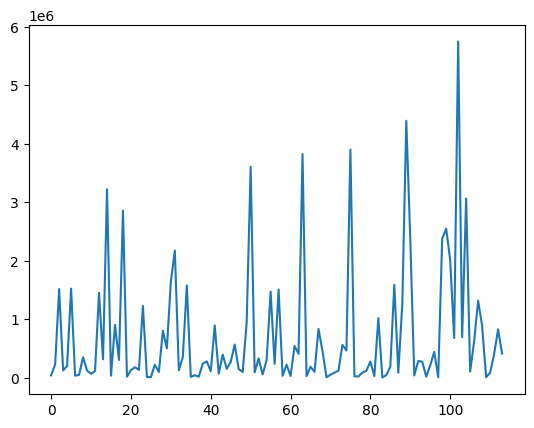

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="red")
plt.show()

In [ ]:
X

Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2  \
0    0.402015  2.297781  2.688829    -1.120221  0.282477  -0.981968 -0.036201   
1    0.402015  2.209180  2.483232    -0.312389  0.471802  -0.944999  0.487788   
2    0.402015  2.172224  2.195472    -0.409148  0.509785  -0.973679  0.683121   
3   -0.603023  2.191353  2.188808    -1.239414  0.982307  -1.198642  0.178327   
4    0.402015  2.019600  1.827317    -0.583918  0.242639  -0.062761 -0.303703   
..        ...       ...       ...          ...       ...        ...       ...   
109 -1.608061 -1.291558 -1.150069    -0.847848  0.824229  -0.886313  0.529760   
110 -1.608061 -1.370919 -1.144899    -0.721838  0.446227  -0.959629  0.588296   
111 -1.608061 -1.288478 -1.216915    -1.427868  0.664495  -1.300016  0.378991   
112 -1.608061 -1.207636 -1.198590     0.292577 -0.025033   0.168419  0.685359   
113 -1.608061 -1.437489 -1.174426    -1.421345  0.616264  -1.677496  0.480178   

     -1.8364285000041605_  -1.2191416092464593_  -0.6018547184887585_  ...  \
0                       0                     0                     0  ...   
1                       0                     0                     0  ...   
2                       0                     0                     0  ...   
3                       0                     0                     0  ...   
4                       0                     0                     0  ...   
..                    ...                   ...                   ...  ...   
109                     0                     1                     0  ...   
110                     0                     1                     0  ...   
111                     0                     1                     0  ...   
112                     0                     1                     0  ...   
113                     1                     0                     0  ...   

      10_poly   11_poly   12_poly   13_poly   14_poly   15_poly   16_poly  \
0    1.016719  1.039782  0.026091  0.915334  0.046034  0.919357  1.024281   
1    1.000000  1.000000  0.202922  0.938239  0.053888  0.978101  1.000000   
2    0.993026  0.944320  0.181742  0.942834  0.047795  1.000000  0.989872   
3    0.996636  0.943030  0.000000  1.000000  0.000000  0.943408  0.994301   
4    0.854438  0.773250  0.246404  0.792245  0.339378  0.758548  0.948046   
..        ...       ...       ...       ...       ...       ...       ...   
109  0.055568  0.043637  0.737888  0.229038  0.759654  0.141830  0.039952   
110  0.049578  0.044037  0.748921  0.210746  0.753424  0.144455  0.018225   
111  0.055801  0.038463  0.687103  0.221308  0.724497  0.135069  0.040795   
112  0.061903  0.039881  0.837742  0.187941  0.849288  0.148808  0.062928   
113  0.000000  0.000000  0.808923  0.096184  0.824776  0.000000  0.000000   

      17_poly   18_poly   19_poly  
0    1.052487  0.194698  0.825415  
1    1.000000  0.393950  0.862726  
2    0.926537  0.370084  0.870211  
3    0.924137  0.165954  0.962304  
4    0.832550  0.326977  0.817564  
..        ...       ...       ...  
109  0.071897  0.263093  0.930156  
110  0.073215  0.294142  0.855736  
111  0.054848  0.120173  0.898708  
112  0.059522  0.544099  0.762957  
113  0.065685  0.121780  0.889212  

[114 rows x 35 columns]

In [ ]:

#population_size=4000 , generations=100 , hall_of_fame=200 , n_components=10
gp = SymbolicTransformer(generations=generations, population_size=population_size,
hall_of_fame=hall_of_fame, n_components=n_components,
function_set=function_set_trans,
parsimony_coefficient=parsimony_coefficient_trans,
max_samples=0.9, verbose=1,
random_state=0, n_jobs=-1)

gp.fit(X_train, y_train)

gp_features = gp.transform(X)

gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

X = X.join (gp_features_df)
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

reg    = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)




print ( 'reg.score (X,y)'            , reg.score (X,y))
print ('reg.score (X_train,y_train)' , reg.score (X_train,y_train))
print ('reg.score (X_test,y_test)'   , reg.score (X_test,y_test))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.49        0.0814154       39         0.348858         0.125686     17.09s
   1    12.72          0.15788       20         0.387531         0.104589      6.37s
   2    13.38         0.187806       33         0.447514          0.16327      5.61s
   3    15.12         0.201719       20         0.496535         0.626991      5.82s
   4    24.12         0.219704       20         0.534471         0.301336      4.62s
   5    32.14         0.247597       56         0.548805         0.819797      7.13s
   6    37.79         0.284561       69         0.616783         0.225604      4.98s
   7    35.40         0.340355       53         0.642962        0.0231784      2.28s
   8    41.69         0.372287       80         0.678511         0.669253  

In [ ]:
X = X.drop (gp_features_df,axis=1)
gp_features = gp.transform(X)
#new_diabetes = np.hstack((diabetes.data, gp_features))

In [ ]:
gp_features

array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [ 6.33671200e-01,  3.24361579e-02, -4.63520973e-02, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [ 1.36130263e+01, -1.90726409e-01,  1.29236043e-01, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features.shape

(114, 50)

In [ ]:
np.hstack((X.values, gp_features))

array([[ 3.28564370e-01,  2.34596186e+00,  2.74680808e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.25190746e+00,  2.53291180e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.21267622e+00,  2.23353521e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [-1.64282185e+00, -1.46104072e+00, -1.31660130e+00, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [-1.64282185e+00, -1.37522237e+00, -1.29753680e+00, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-1.64282185e+00, -1.61922311e+00, -1.27239721e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)
gp_features_df

0_        1_        2_           3_         4_            5_  \
0    -0.000000  0.000000 -0.000000    -0.000000   0.000000      0.005451   
1    -0.000000  0.000000 -0.000000    -0.000000   0.000000      0.001406   
2    -0.000000  0.000000 -0.000000    -0.000000   0.000000      0.000859   
3     0.000000  0.000000 -0.000000    -0.000000   0.000000      0.003237   
4    -0.000000  0.000000  0.000000    -0.000000   0.000000     -0.000000   
..         ...       ...       ...          ...        ...           ...   
109   2.580641  0.032252 -0.048726 -3616.301567  31.170070  -5072.459452   
110   0.731506 -0.025702  0.036232  2104.708103  54.497773   4056.056077   
111   0.633671  0.032436 -0.046352 -3076.216264  39.019246  -6091.381937   
112  13.613026 -0.190726  0.129236  9966.864519  73.666329  10885.320336   
113  -0.000000  0.000000 -0.000000    -0.000000  -0.000000     -0.001286   

            6_        7_            8_        9_  ...       40_       41_  \
0    -0.000000  0.000000     -0.000000  0.000000  ...  0.000000 -0.000000   
1    -0.000000  0.000000     -0.000000  0.000000  ...  0.000000 -0.000000   
2    -0.000000  0.000000     -0.000000  0.000000  ...  0.000000 -0.000000   
3    -0.000000  0.000000     -0.000000  0.000000  ...  0.000000 -0.000000   
4    -0.000000  0.000000      0.000000  0.000000  ...  0.000000 -0.000000   
..         ...       ...           ...       ...  ...       ...       ...   
109  -2.184131  0.013713 -13192.186709  0.358851  ...  0.009172 -0.048726   
110  -0.669802 -0.010937  12119.460198 -0.168633  ... -0.007784  0.036232   
111  -0.442521  0.009417 -11653.415635  0.526852  ...  0.007826 -0.046352   
112 -12.780124 -0.050808  41371.048432 -1.571688  ... -0.023536  0.129236   
113  -0.000000  0.000000     -0.000000 -0.000000  ...  0.000000 -0.000000   

          42_            43_         44_         45_        46_       47_  \
0   -0.000000       5.450686    0.535502    0.000000   0.000000 -0.000000   
1   -0.000000       1.405797    0.244633    0.000000   0.000000 -0.000000   
2   -0.000000       0.859032    0.155889    0.000000   0.000000 -0.000000   
3   -0.000000       3.237149    0.471407    0.000000   0.000000 -0.000000   
4   -0.000000      -0.000000   -0.000000    0.000000   0.000000 -0.000000   
..        ...            ...         ...         ...        ...       ...   
109  0.017776  -61112.249672  192.154318  276.894949 -11.504173  0.102855   
110  0.003260   -7107.671363  -65.800995 -206.831756 -25.250262  0.176545   
111  0.002352   -7640.736132   66.766107  267.710815 -14.354730  0.116854   
112  0.039029 -109015.750263 -252.652608 -713.334202 -29.277572  0.264622   
113 -0.000000      -1.651084    0.154814    0.000000   0.000000 -0.000000   

          48_           49_  
0    0.000000 -0.000000e+00  
1    0.000000 -0.000000e+00  
2    0.000000 -0.000000e+00  
3    0.000000 -0.000000e+00  
4    0.000000 -0.000000e+00  
..        ...           ...  
109 -0.397141 -2.830884e+10  
110 -0.452283  1.180708e+10  
111 -0.368781 -6.465395e+09  
112 -0.458798  5.725796e+10  
113  0.000000 -0.000000e+00  

[114 rows x 50 columns]

In [ ]:

#X = X.drop (gp_features_df,axis=1)

X = X.join (gp_features_df)
X

Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2  \
0    0.328564  2.345962  2.746808    -1.063660  0.254197  -1.007627  0.142488   
1    0.328564  2.251907  2.532912    -0.279537  0.451914  -0.972083  0.538486   
2    0.328564  2.212676  2.233535    -0.373456  0.491581  -0.999657  0.686106   
3   -0.657129  2.232983  2.226602    -1.179355  0.985050  -1.215951  0.304615   
4    0.328564  2.050659  1.850519    -0.543097  0.212593  -0.123845 -0.059673   
..        ...       ...       ...          ...       ...        ...       ...   
109 -1.642822 -1.464310 -1.247057    -0.799281  0.819965  -0.915658  0.570206   
110 -1.642822 -1.548557 -1.241678    -0.676969  0.425206  -0.986149  0.614444   
111 -1.642822 -1.461041 -1.316601    -1.362277  0.653149  -1.313418  0.456264   
112 -1.642822 -1.375222 -1.297537     0.307674 -0.066945   0.098426  0.687798   
113 -1.642822 -1.619223 -1.272397    -1.355946  0.602780  -1.676351  0.532734   

     -2.0235481185165343_  -1.3773730890742797_  -0.7311980596320249_  ...  \
0                       0                     0                     0  ...   
1                       0                     0                     0  ...   
2                       0                     0                     0  ...   
3                       0                     0                     0  ...   
4                       0                     0                     0  ...   
..                    ...                   ...                   ...  ...   
109                     0                     1                     0  ...   
110                     0                     1                     0  ...   
111                     0                     1                     0  ...   
112                     0                     1                     0  ...   
113                     1                     0                     0  ...   

          40_       41_       42_            43_         44_         45_  \
0    0.000000 -0.000000 -0.000000       5.450686    0.535502    0.000000   
1    0.000000 -0.000000 -0.000000       1.405797    0.244633    0.000000   
2    0.000000 -0.000000 -0.000000       0.859032    0.155889    0.000000   
3    0.000000 -0.000000 -0.000000       3.237149    0.471407    0.000000   
4    0.000000 -0.000000 -0.000000      -0.000000   -0.000000    0.000000   
..        ...       ...       ...            ...         ...         ...   
109  0.009172 -0.048726  0.017776  -61112.249672  192.154318  276.894949   
110 -0.007784  0.036232  0.003260   -7107.671363  -65.800995 -206.831756   
111  0.007826 -0.046352  0.002352   -7640.736132   66.766107  267.710815   
112 -0.023536  0.129236  0.039029 -109015.750263 -252.652608 -713.334202   
113  0.000000 -0.000000 -0.000000      -1.651084    0.154814    0.000000   

           46_       47_       48_           49_  
0     0.000000 -0.000000  0.000000 -0.000000e+00  
1     0.000000 -0.000000  0.000000 -0.000000e+00  
2     0.000000 -0.000000  0.000000 -0.000000e+00  
3     0.000000 -0.000000  0.000000 -0.000000e+00  
4     0.000000 -0.000000  0.000000 -0.000000e+00  
..         ...       ...       ...           ...  
109 -11.504173  0.102855 -0.397141 -2.830884e+10  
110 -25.250262  0.176545 -0.452283  1.180708e+10  
111 -14.354730  0.116854 -0.368781 -6.465395e+09  
112 -29.277572  0.264622 -0.458798  5.725796e+10  
113   0.000000 -0.000000  0.000000 -0.000000e+00  

[114 rows x 85 columns]

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)

In [ ]:
reg.score (X,y)

-9.000463985718417

In [ ]:
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [ ]:
reg.score (X_train,y_train)

0.9505300237791671

In [ ]:
reg.score (X_test,y_test)

-27.16903559731706

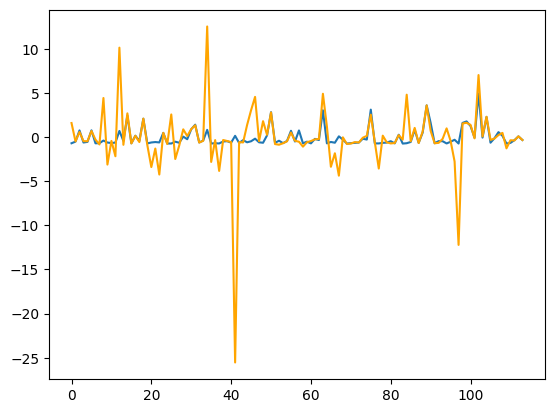

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="orange")
plt.show()

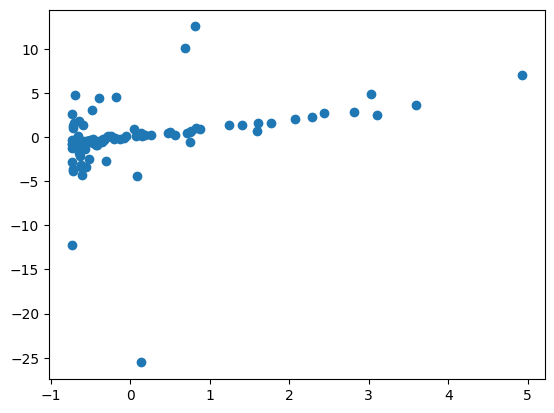

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

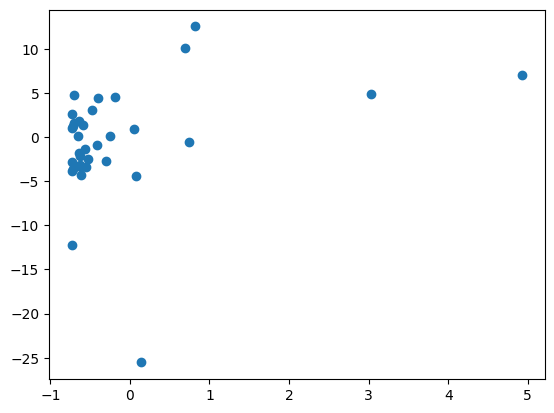

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y.loc [test_indicies],pd.Series (y_pred).loc[test_indicies])
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
# Creating and training the symbolic regressor
#parsimony_coefficient=0.0001 ,  generations=50
function_set = ['add', 'sub', 'mul', 'div' , 'sqrt', 'log', 'abs', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=10000,
                           generations=5, stopping_criteria=0.1,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=function_set,
                           parsimony_coefficient=0.00000000000001, random_state=0,n_jobs=-1)
est_gp.fit(X, y)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.38      1.77874e+22        4          0.53947          0.85718     25.04s
   1     6.60      5.36263e+17       29          0.49823          1.30843     27.55s
   2     6.94      1.54325e+12        2         0.505548          1.71147     20.42s
   3     7.59      5.56695e+11       10         0.474133          1.35068      8.46s
   4     8.50      1.08291e+12        4         0.454699          1.57774      0.00s


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv'],
                  generations=5, max_samples=0.9, n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=1e-14,
                  population_size=10000, random_state=0, stopping_criteria=0.1,
                  verbose=1)

In [ ]:
# Making predictions
y_pred_g = est_gp.predict(X)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y, y_pred_g))


Model expression: sub(X59, abs(0.402))
Mean Squared Error: 1.102181748859987


In [ ]:
est_gp.score(X,y)

-0.10218174885998699

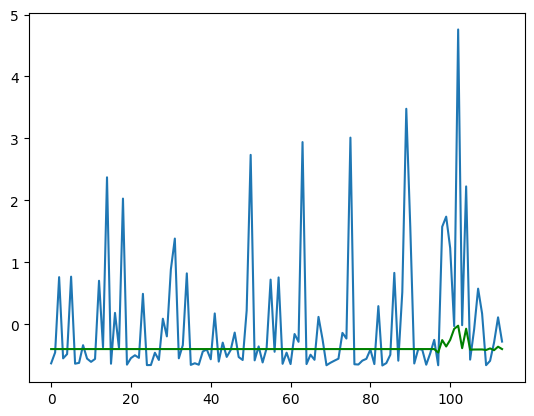

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred_g ,color ="green")
plt.show()

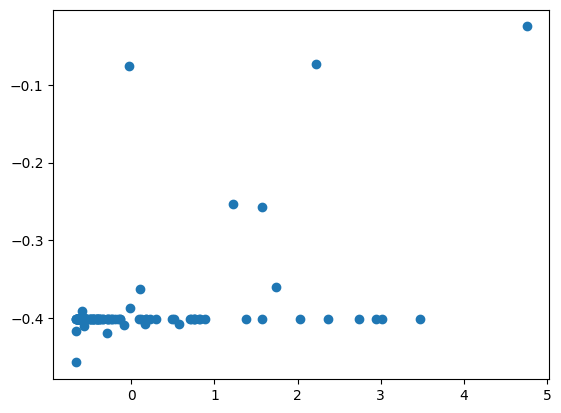

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred_g)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
X.shape [0] // number_of_test_per_fold

114

In [ ]:
kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

fold_number     = 0

kfold_pred_dict = {fold_test_index :np.array([])  ,
                   fold_y_pred     : np.array ([]) ,
                   }

kfold_pred_list = []
model_NN = MLPRegressor(
    hidden_layer_sizes=(250, 200, 100, 100,100),  # More layers and different numbers of neurons
    activation='tanh',  # Different activation function
    solver='sgd',  # Different optimizer
    learning_rate_init=0.01,  # Initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch size
    alpha=0.0001,  # L2 regularization
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=20,  # Patience for early stopping
    random_state=0
)

for i, (train_index, test_index) in enumerate(kf.split(X)):
      print(f"Fold {i}:")
      print(f"  Train: index={train_index}")
      print(f"  Test:  index={test_index}")

      X_train_fold  = X.loc [train_index]
      X_test_fold   = X.loc [test_index]

      y_train_fold  = y.loc [train_index]
      y_test_fold   = y.loc [test_index]

      reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
      #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

      fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

      kfold_pred_dict [fold_test_index] =  test_index
      kfold_pred_dict [fold_y_pred]     =  fold_y_pred_value.reshape (-1)
      kfold_pred_dict [fold_num ]       =  i

      kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))


      print ( kfold_pred_dict)

kfold_pred_df = pd.concat (kfold_pred_list)


Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108
 109 110 111 112 113]
  Test:  index=[106]
{'fold_test_index': array([106]), 'fold_y_pred': array([-7.93155962e+08]), 'fold_num': 0}
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  

In [ ]:
data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)
data_input

LPB                           MMC  Year       LP     LTIV  PC  \
0    1000   iPhone XS Max_512GB_Verizon  2018  1029.35  656.816  19   
1    1000  iPhone XS Max_512GB_Unlocked  2018  1014.39  634.388  20   
2    1000  iPhone XS Max_256GB_Unlocked  2018  1008.15  602.997  20   
3    1000        iPhone X_256GB_Verizon  2017  1011.38  602.270  19   
4     900   iPhone XS Max_256GB_Verizon  2018   982.38  562.836  20   
..    ...                           ...   ...      ...      ...  ..   
109   400       iPhone 7_256GB_T-Mobile  2016   423.30  238.041  17   
110   400       iPhone 7_128GB_T-Mobile  2016   409.90  238.605  19   
111   400            iPhone 7_32GB_AT&T  2016   423.82  230.749  20   
112   400   iPhone 7 Plus_32GB_T-Mobile  2016   437.47  232.748  19   
113   300        iPhone 7_32GB_T-Mobile  2016   398.66  235.384  18   

     Price_Decay  Price_R2  TIV_Decay    TIV_R2   Profit    Profit_Pred  \
0      -0.001192  0.894662  -0.001335  0.879887    41381 -531899.697988   
1      -0.001009  0.911918  -0.001326  0.918513   227473  790518.041632   
2      -0.001031  0.915380  -0.001333  0.932912  1514777  736038.014269   
3      -0.001220  0.958448  -0.001388  0.895701   126462  915436.593137   
4      -0.001070  0.891031  -0.001114  0.860168   199737 -786018.700838   
..           ...       ...        ...       ...      ...            ...   
109    -0.001130  0.944040  -0.001312  0.921607     9867  535338.497667   
110    -0.001102  0.909587  -0.001330  0.925922    84340  427041.757517   
111    -0.001262  0.929481  -0.001412  0.910493   397857  481107.547500   
112    -0.000871  0.866634  -0.001058  0.933077   827457  676207.107730   
113    -0.001261  0.925085  -0.001503  0.917952   413425  413424.981862   

      fold_y_pred  fold_num  
0   -2.291341e+06         9  
1    9.519541e+05        92  
2    2.593205e+05       109  
3   -6.221203e+05        48  
4    6.485786e+06       101  
..            ...       ...  
109 -9.084934e+09        35  
110 -4.666813e+09         4  
111  9.407326e+09        70  
112  7.003193e+09        51  
113 -4.713473e+07        88  

[114 rows x 14 columns]

In [ ]:
kfold_pred_df.shape

(114, 3)

In [ ]:
kfold_pred_df [fold_test_index].duplicated().sum ()

0

<Axes: xlabel='Profit', ylabel='fold_y_pred'>

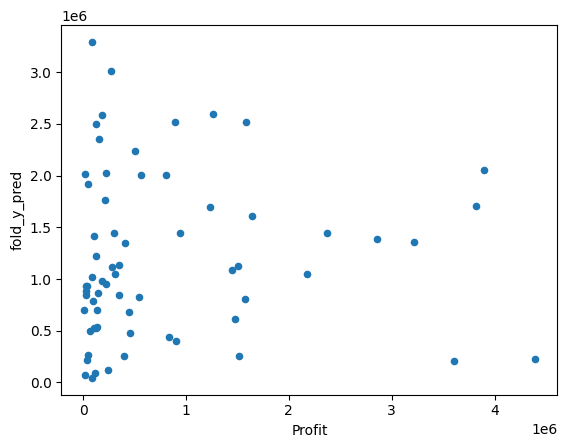

In [ ]:
data_input [(data_input [fold_y_pred] < data_input [Target].max() ) *
            (data_input [fold_y_pred] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_pred)

         Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2
0    0.328564  2.345962  2.746808    -1.063660  0.254197  -1.007627  0.142488
1    0.328564  2.251907  2.532912    -0.279537  0.451914  -0.972083  0.538486
2    0.328564  2.212676  2.233535    -0.373456  0.491581  -0.999657  0.686106
3   -0.657129  2.232983  2.226602    -1.179355  0.985050  -1.215951  0.304615
4    0.328564  2.050659  1.850519    -0.543097  0.212593  -0.123845 -0.059673
..        ...       ...       ...          ...       ...        ...       ...
109 -1.642822 -1.464310 -1.247057    -0.799281  0.819965  -0.915658  0.570206
110 -1.642822 -1.548557 -1.241678    -0.676969  0.425206  -0.986149  0.614444
111 -1.642822 -1.461041 -1.316601    -1.362277  0.653149  -1.313418  0.456264
112 -1.642822 -1.375222 -1.297537     0.307674 -0.066945   0.098426  0.687798
113 -1.642822 -1.619223 -1.272397    -1.355946  0.602780  -1.676351  0.532734

[114 rows x 7 columns]
Fold 0:
  Train: index=[  0   1   2   3 

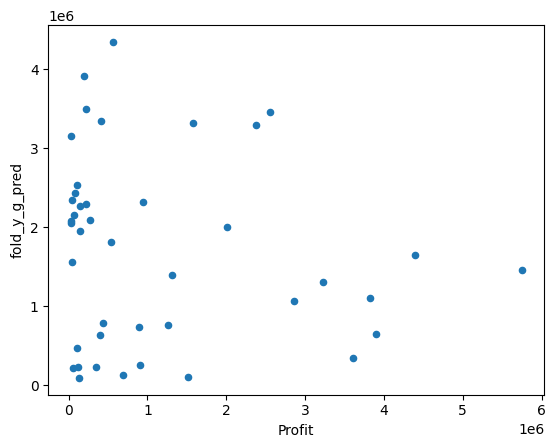

In [ ]:

if Kfold_symbolic :
    kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

    fold_number     = 0

    kfold_pred_dict = {fold_test_index :np.array([])  ,
                      fold_y_g_pred      : np.array ([]) ,
                      }

    kfold_pred_list = []


    for i, (train_index, test_index) in enumerate(kf.split(X)):
          if gp_features_df.columns [0] in X.columns :
            X = X.drop (gp_features_df,axis =1)
          if interaction_df.columns [0] in X.columns :
            X = X.drop (interaction_df,axis =1)
          print (X)
          print(f"Fold {i}:")
          print(f"  Train: index={train_index}")
          print(f"  Test:  index={test_index}")

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          gp = SymbolicTransformer(generations=generations, population_size=population_size,
          hall_of_fame=hall_of_fame, n_components=n_components,
          function_set=function_set_trans,
          parsimony_coefficient=parsimony_coefficient_trans,
          max_samples=0.9, verbose=1,
          random_state=0, n_jobs=-1)

          gp.fit(X_train_fold, y_train_fold)

          gp_features = gp.transform(X)

          gp_features_df = pd.DataFrame (gp_features)
          gp_features_rename_dict = {}
          for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
          gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

          X = X.join (gp_features_df)

          poly           = PolynomialFeatures(2,interaction_only=False)
          interaction_df = pd.DataFrame ( poly.fit_transform(X) )
          interaction_df_rename_dict = {}
          for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
          interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
          sel_col_indicies        = [ random.randint (0, interaction_df.shape [1]-X.shape [1] -1) for _ in range (int (interaction_df.shape [1] * 0.01))]
          print (interaction_df.shape)
          interaction_df  = interaction_df.T.drop_duplicates().T
          interaction_df  = interaction_df.iloc [:,sel_col_indicies]

          X = X.join (interaction_df)

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
          #reg_fold = est_gp.fit(X_train_fold, y_train_fold)
          #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

          fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

          kfold_pred_dict [fold_test_index]   =  test_index
          kfold_pred_dict [fold_y_g_pred]     =  fold_y_pred_value.reshape (-1)
          kfold_pred_dict [fold_num ]         =  i

          kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))



          print ( kfold_pred_dict)

    kfold_pred_df = pd.concat (kfold_pred_list)

    data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)

    data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
